<a href="https://colab.research.google.com/github/SaahilShaikh17/AAIT-Retirement/blob/main/AAIT_Retirement_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEAM AAIT-Retirement Savings Estimator
Team members:
Saahil Shaikh, Sachit Desai, Sanjana Sharma, Sehaj Saluja

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/SaahilShaikh17/AAIT-Retirement/main/nedgroup_training_data.csv")
df_validation=pd.read_csv("https://raw.githubusercontent.com/SaahilShaikh17/AAIT-Retirement/main/nedgroup_validation_data.csv")
df_test=pd.read_csv("https://raw.githubusercontent.com/SaahilShaikh17/AAIT-Retirement/main/nedgroup_testing_data.csv")

In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
df.head()


In [ ]:
df.shape

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df_validation.drop('Unnamed: 0',axis=1,inplace=True)
df_test.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.nunique()

Gender, Financially Support Partner, financially support children, years_supporting_child, Years_supporting_Someone_else, Has_emergency_savings, Confidence_Level, spouse_Gender

So we have 8 categorical variables


## Data Issues

In [ ]:
#Check if there are any duplicated values in our dataset
print(df.duplicated().sum())
print(df_validation.duplicated().sum())
print(df_test.duplicated().sum())

In [ ]:
df.drop_duplicates(inplace=True)
df_validation.drop_duplicates(inplace=True)

In [ ]:

print(df.duplicated().sum())
print(df_validation.duplicated().sum())
print(df_test.duplicated().sum())

In [ ]:
df.shape

## EDA


In [ ]:
summary_stats = df.describe()
print(summary_stats)

       RETIREMENT_AGE  RETIREMENT_FUND_VALUE    DEPT_VALUE  \
count    16083.000000           1.608300e+04   16083.00000   
mean        74.777778           7.362968e+06  123698.45346   
std         10.375777           3.858392e+06   72305.78555   
min         60.000000           5.001570e+05      32.00000   
25%         66.000000           4.100181e+06   60767.00000   
50%         73.000000           6.946065e+06  123290.00000   
75%         82.000000           1.049586e+07  186235.00000   
max        100.000000           1.499862e+07  249988.00000   

       CURRENT_NET_MONTHLY_INCOME  SPARE_CASH_VALUE  YEARS_SUPPORTING_CHILD  \
count                16083.000000      16083.000000            16083.000000   
mean                  3781.336069     124319.997513                1.261270   
std                   2167.403240      72002.554520                1.477901   
min                      0.000000         21.000000                0.000000   
25%                   1920.000000      62260.5

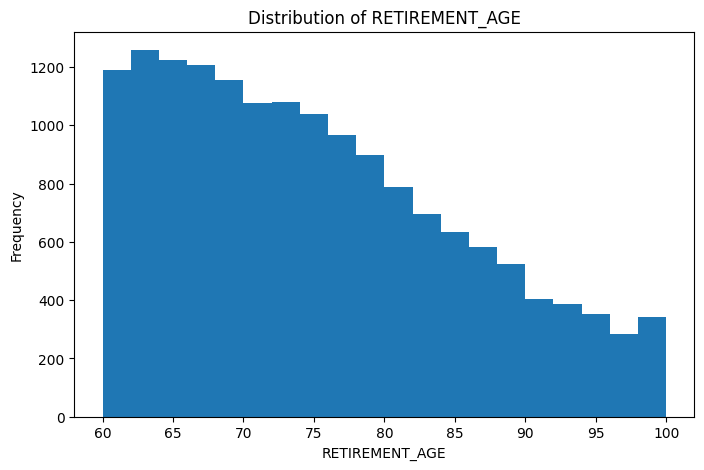

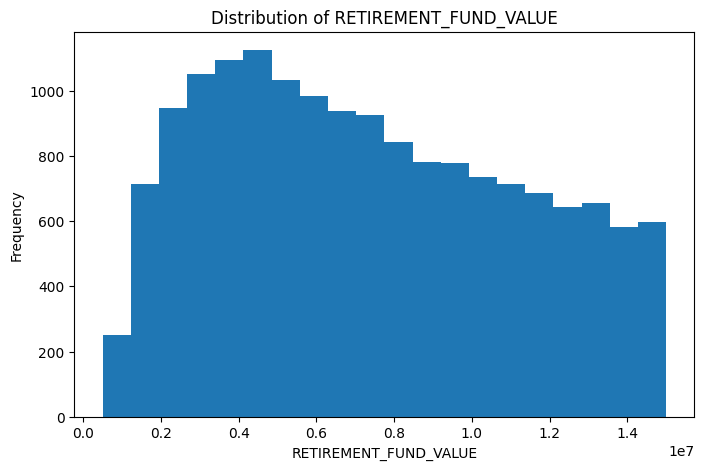

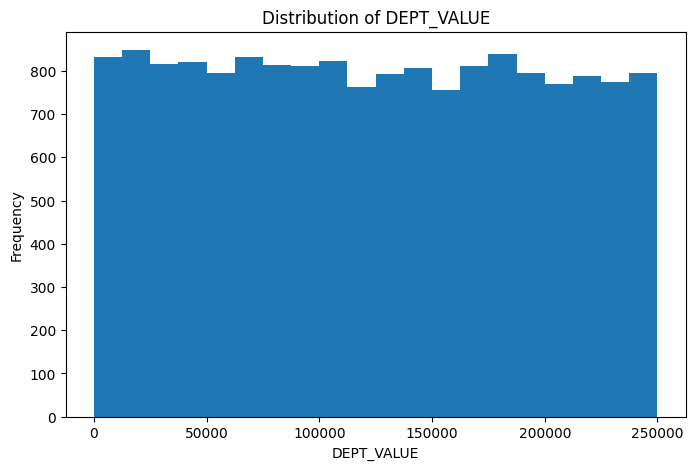

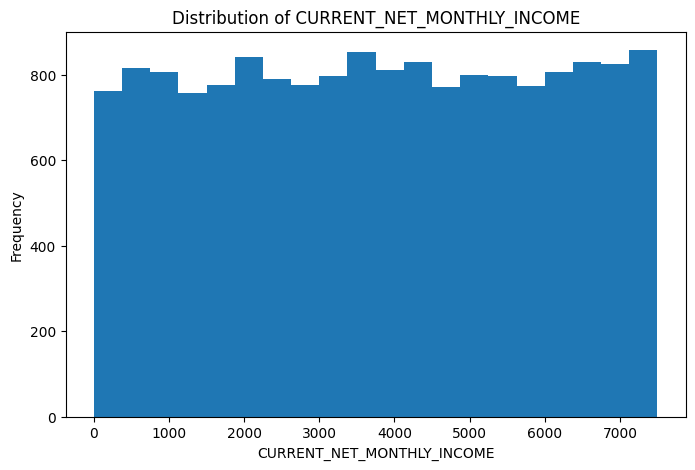

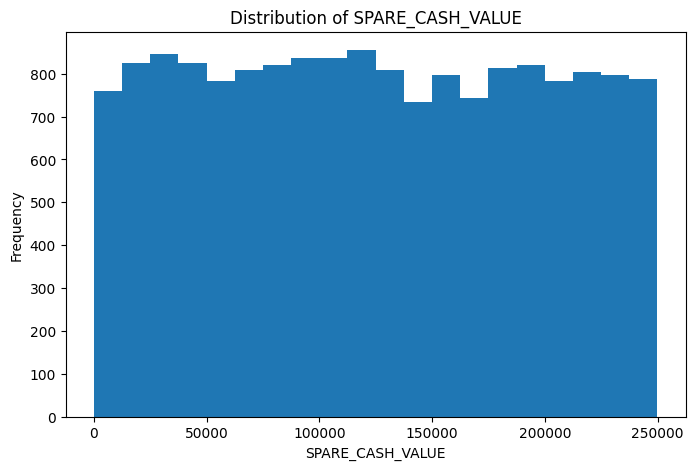

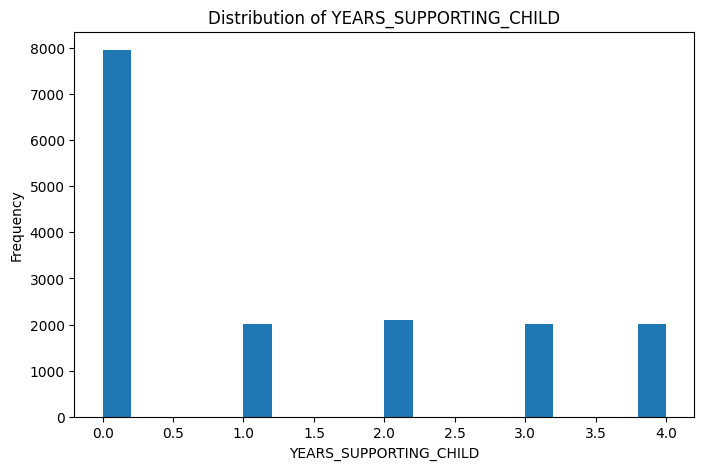

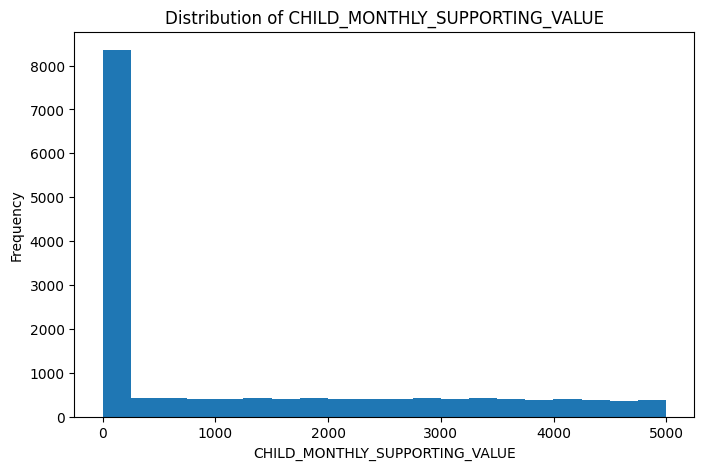

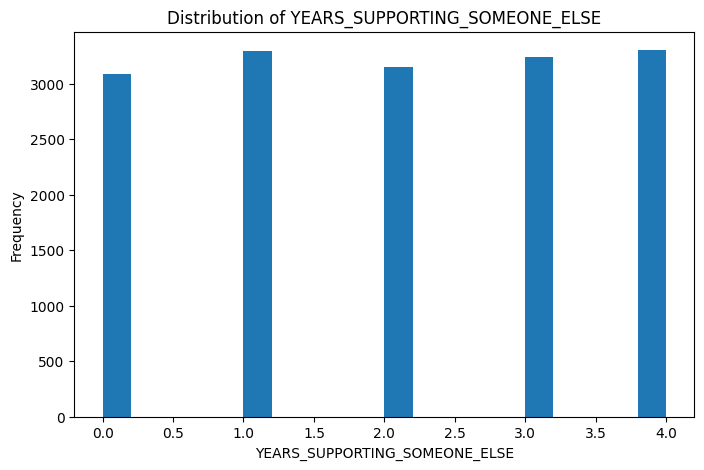

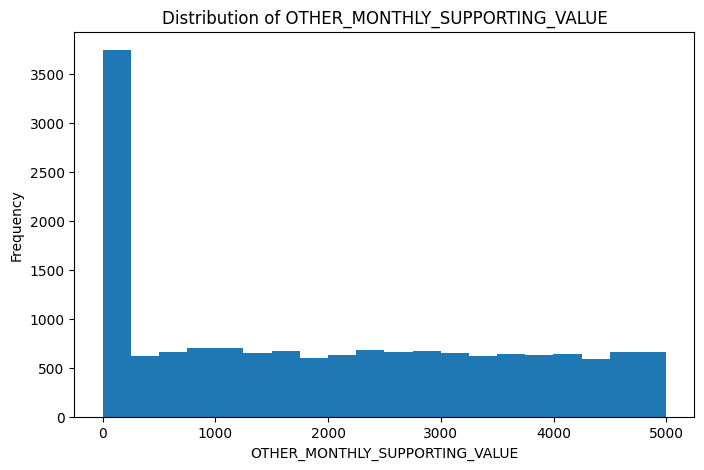

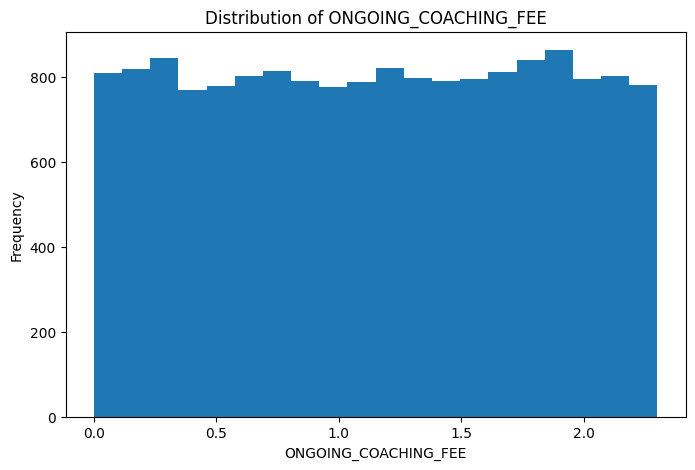

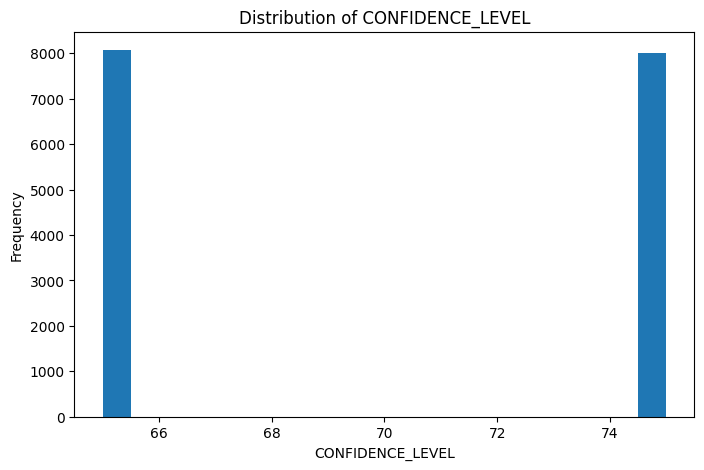

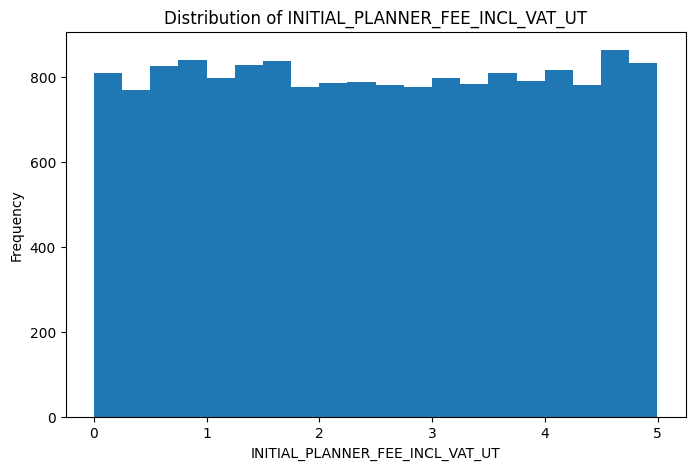

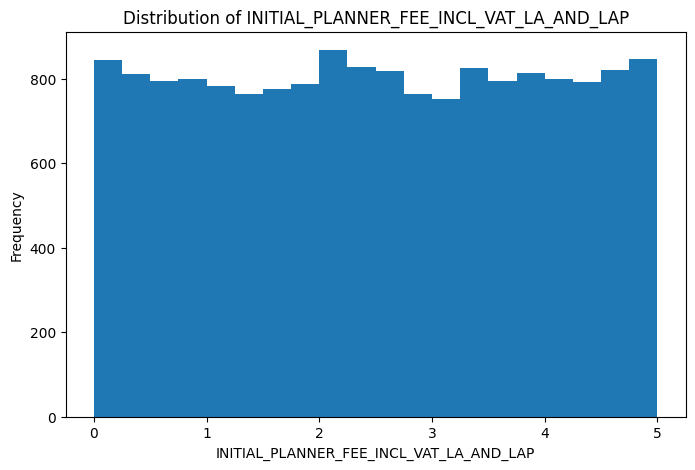

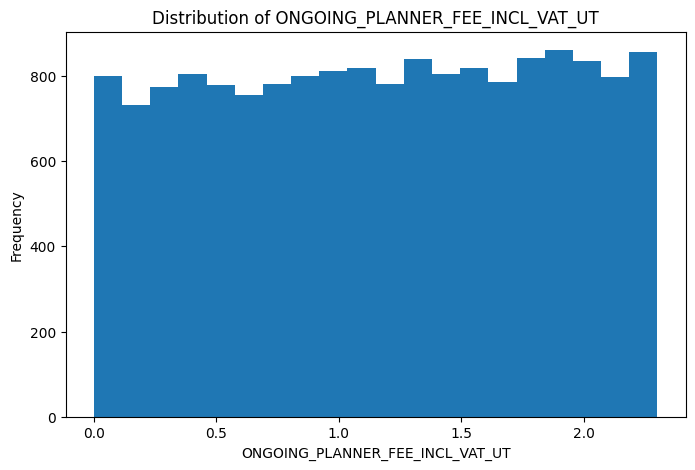

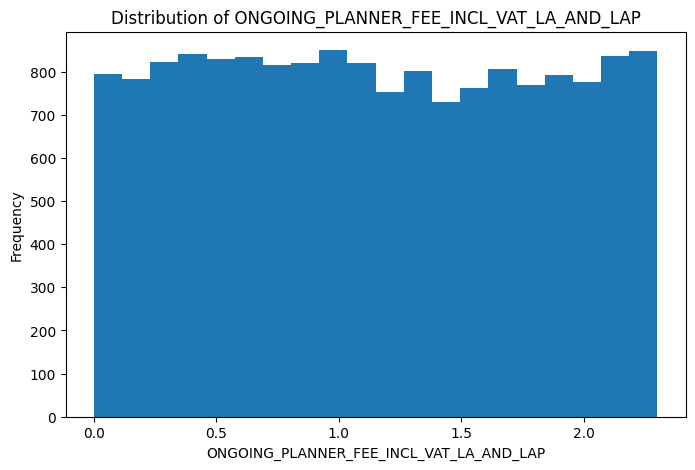

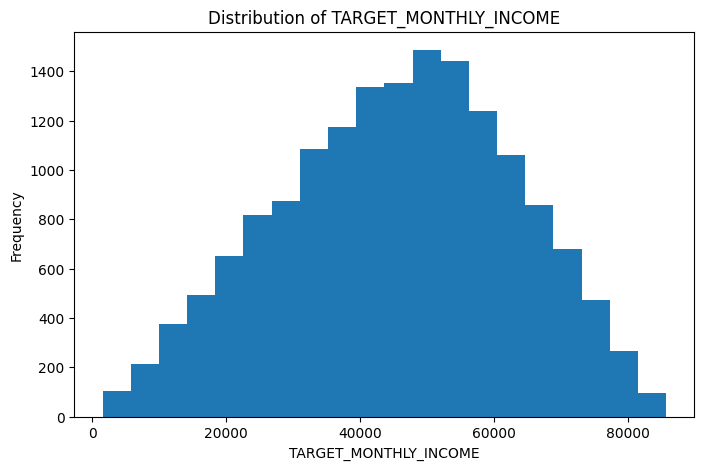

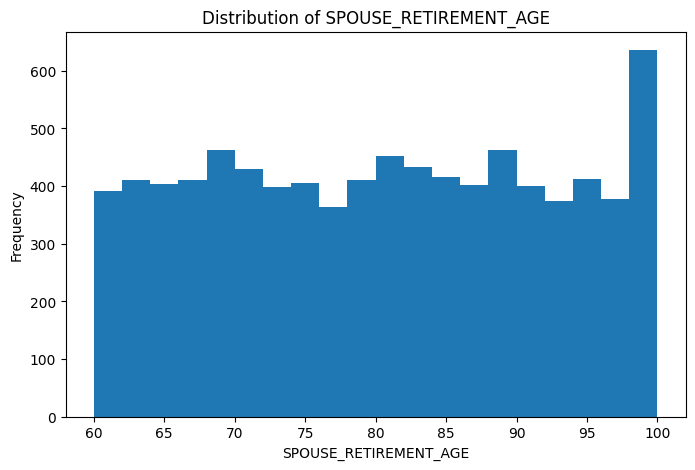

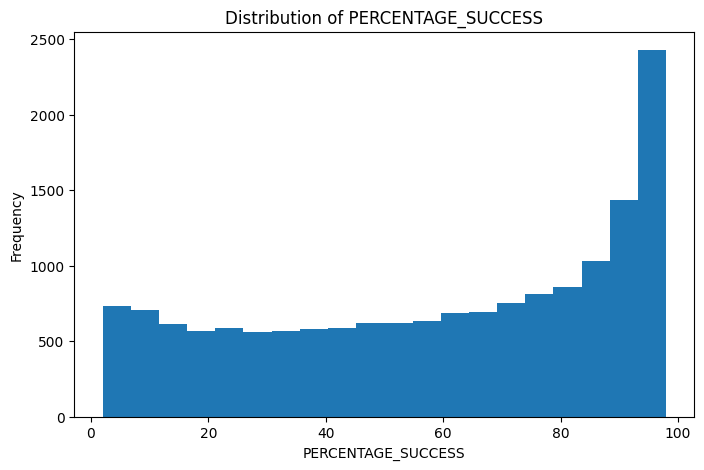

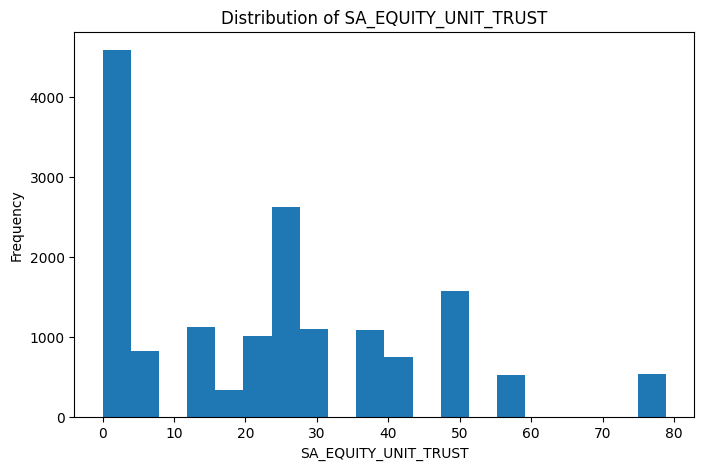

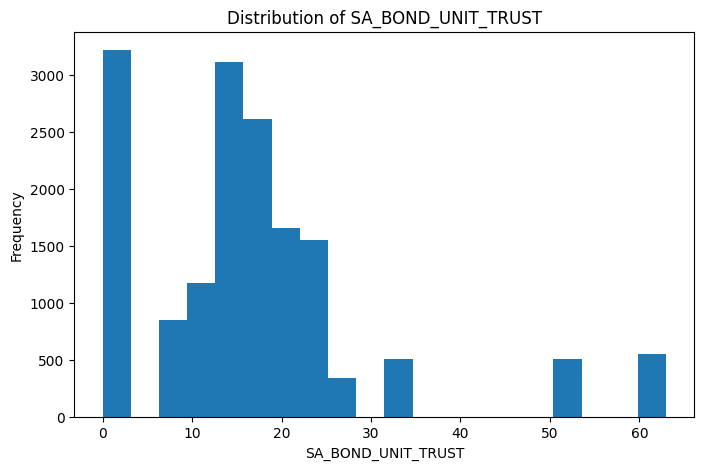

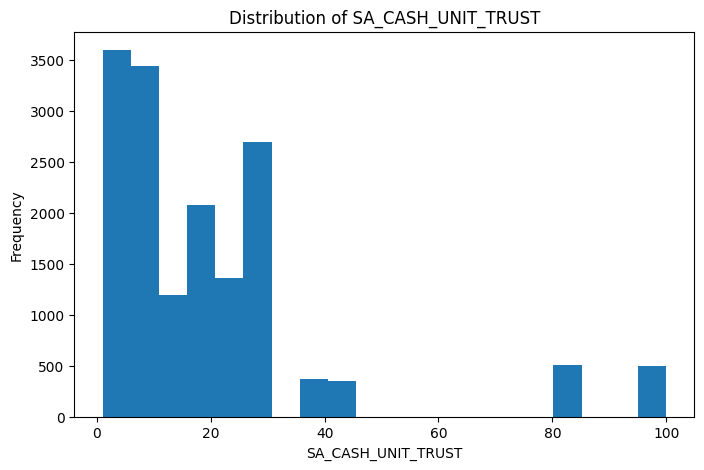

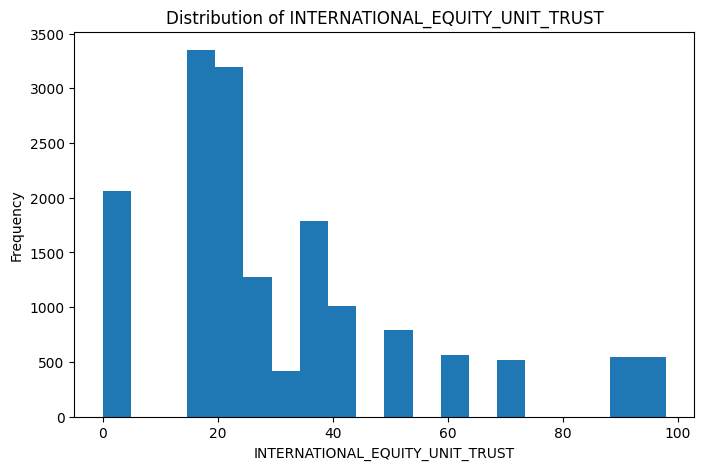

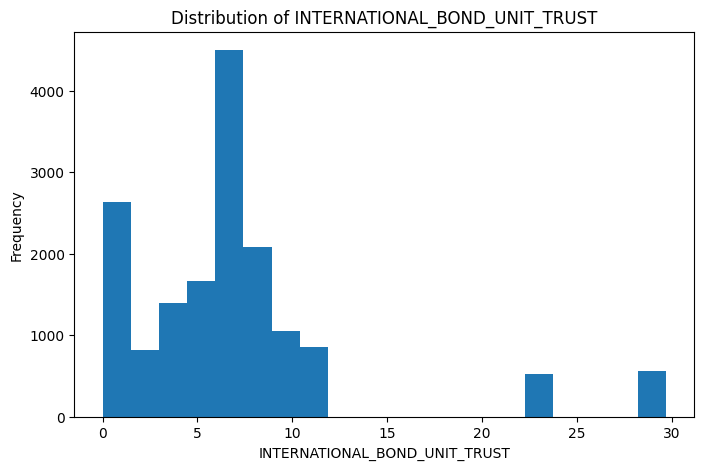

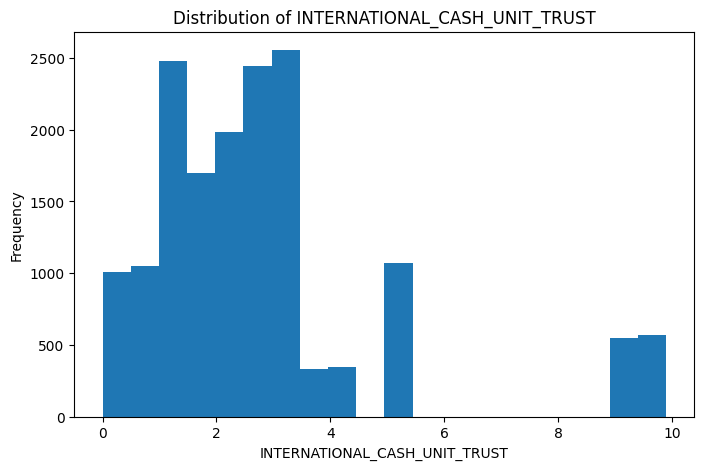

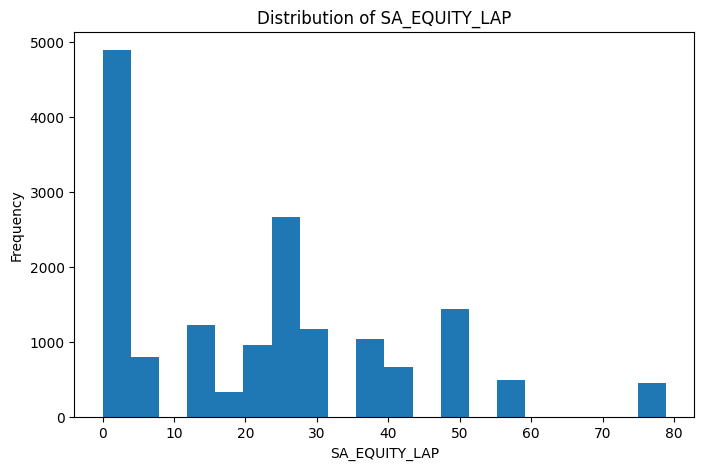

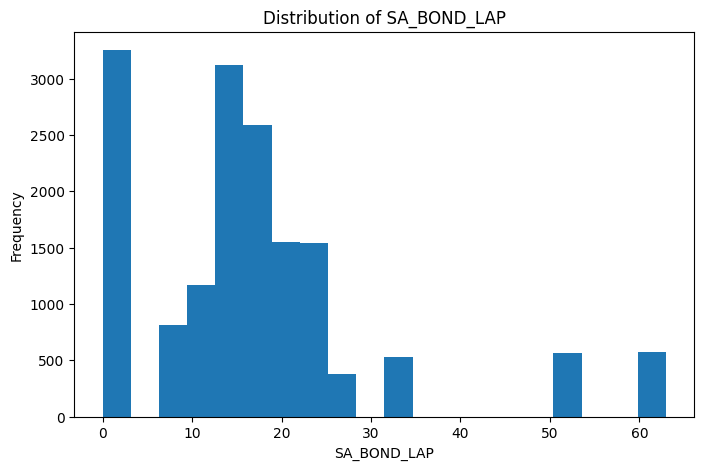

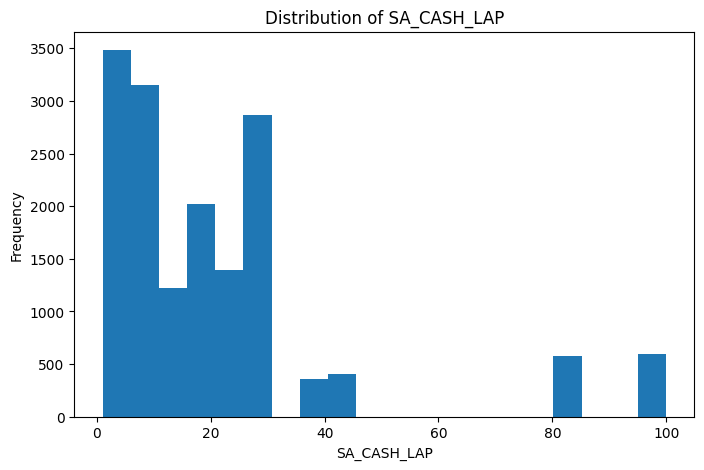

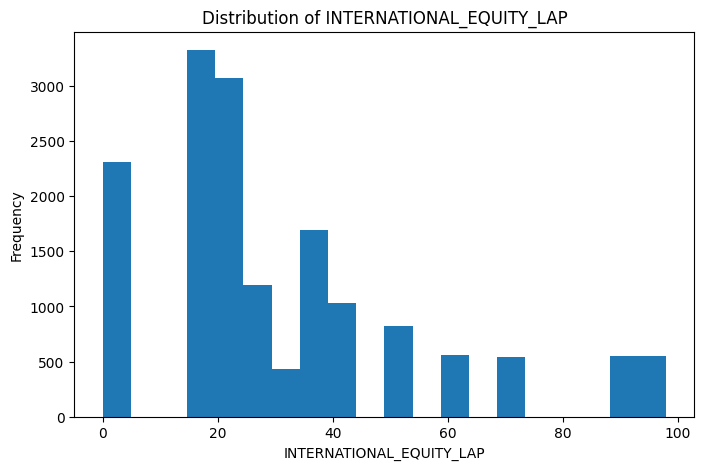

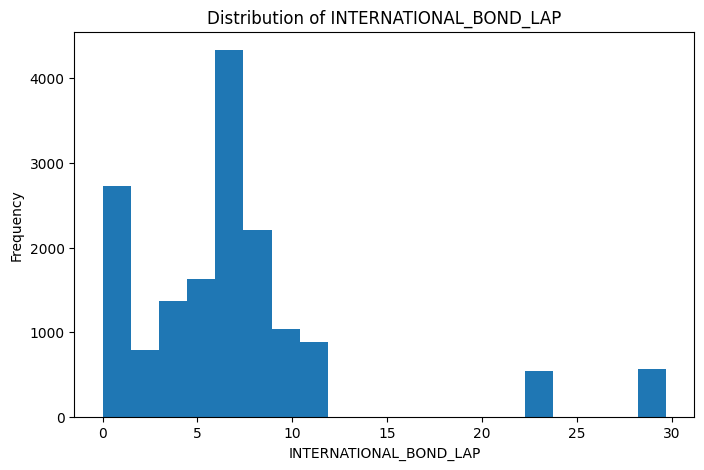

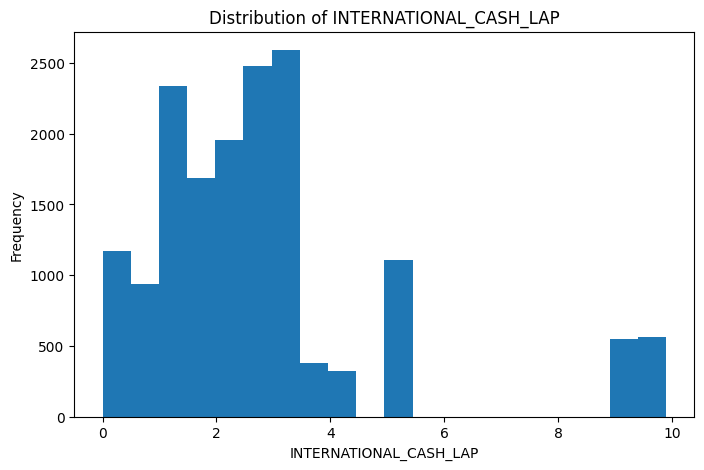

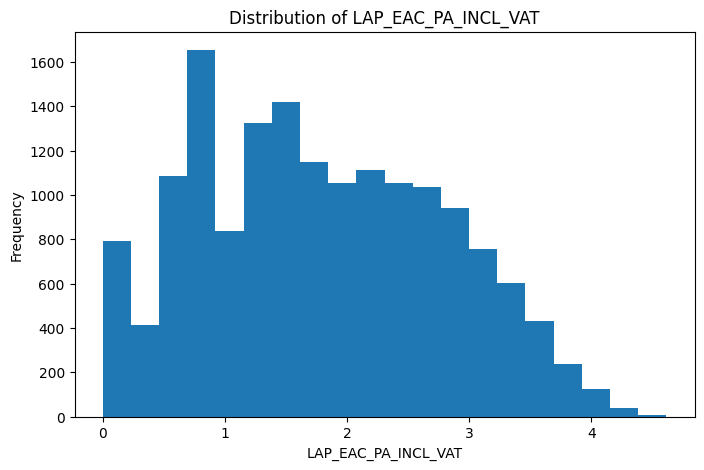

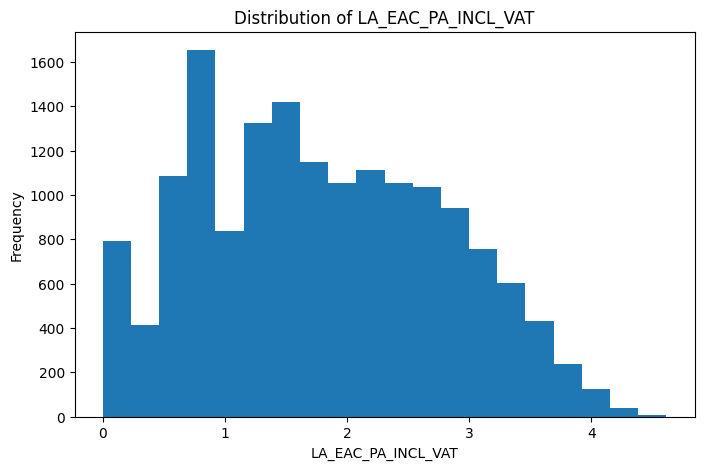

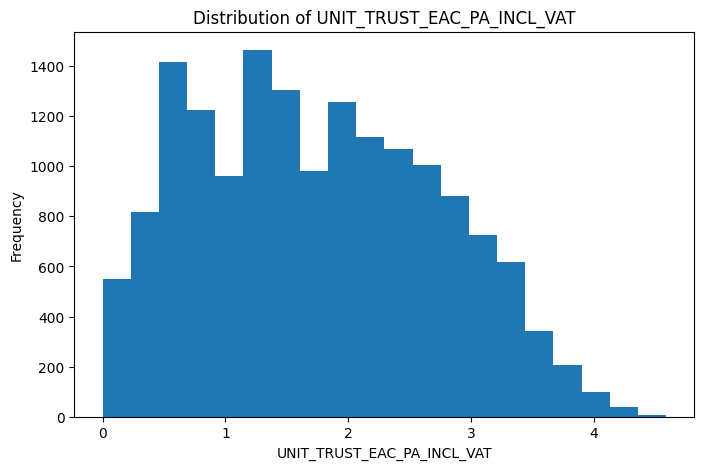

In [ ]:
# 2. Data Distribution Visualization
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

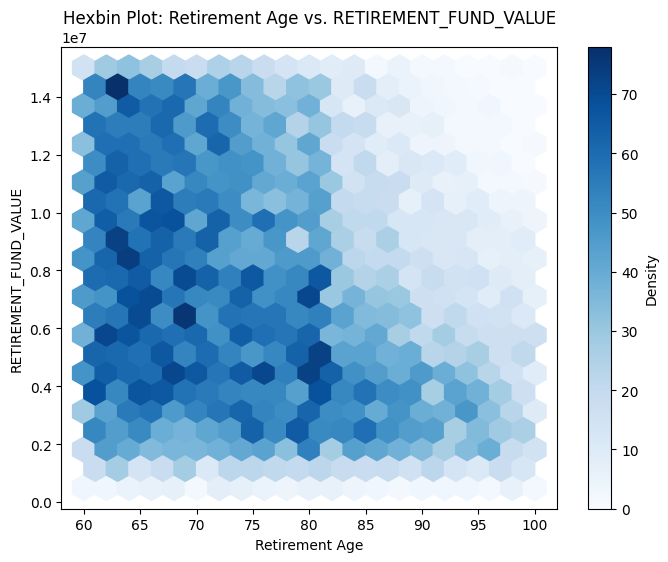

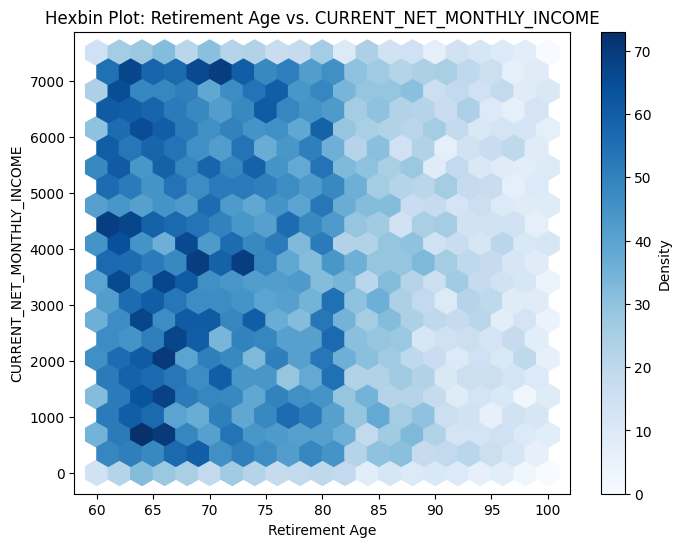

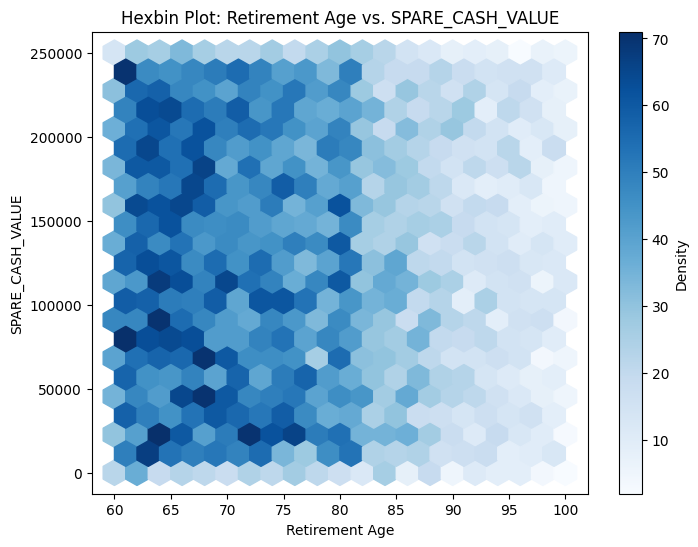

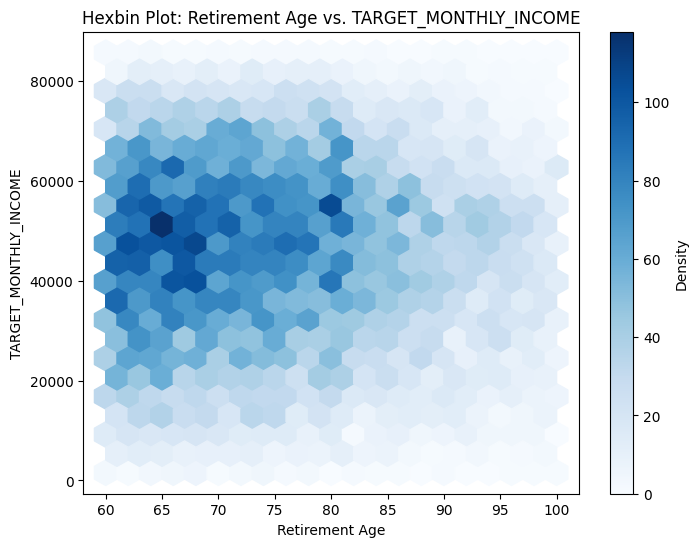

In [ ]:
# Select the numerical columns you want to compare with "RETIREMENT_AGE"
numerical_columns = ['RETIREMENT_FUND_VALUE', 'CURRENT_NET_MONTHLY_INCOME', 'SPARE_CASH_VALUE', 'TARGET_MONTHLY_INCOME']

# Create separate hexbin plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['RETIREMENT_AGE'], df[col], gridsize=20, cmap='Blues')
    plt.title(f'Hexbin Plot: Retirement Age vs. {col}')
    plt.xlabel('Retirement Age')
    plt.ylabel(col)
    plt.colorbar(label='Density')
    plt.show()


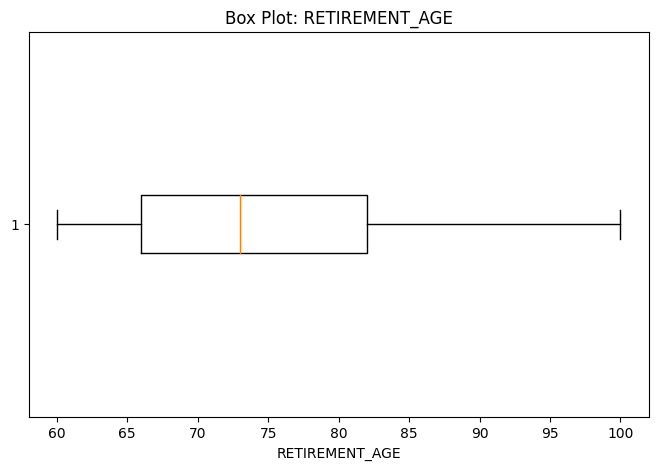

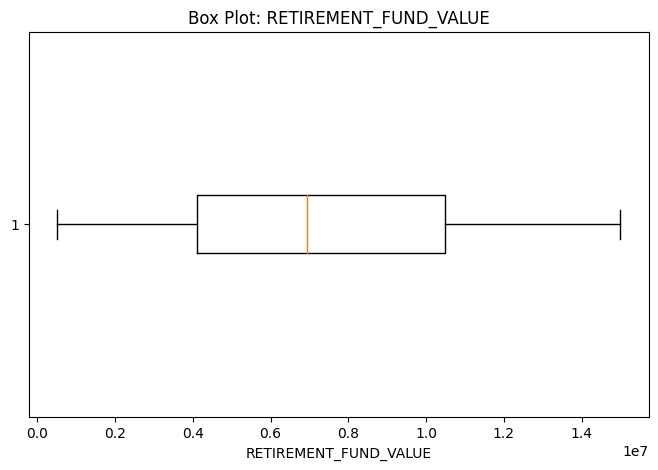

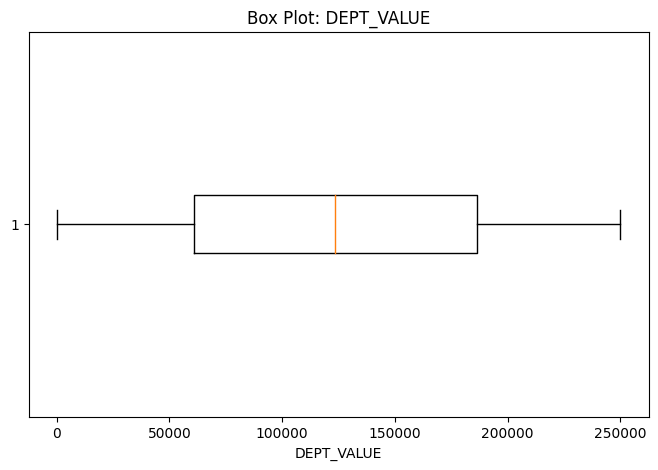

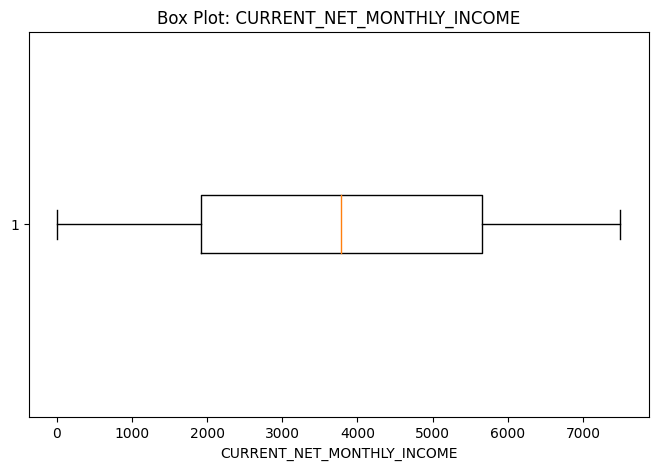

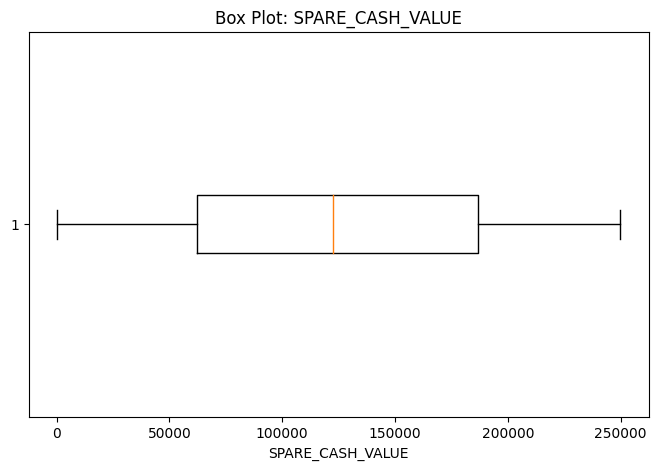

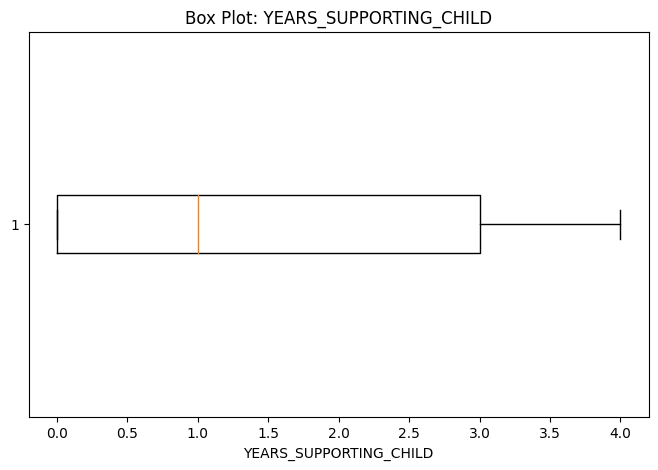

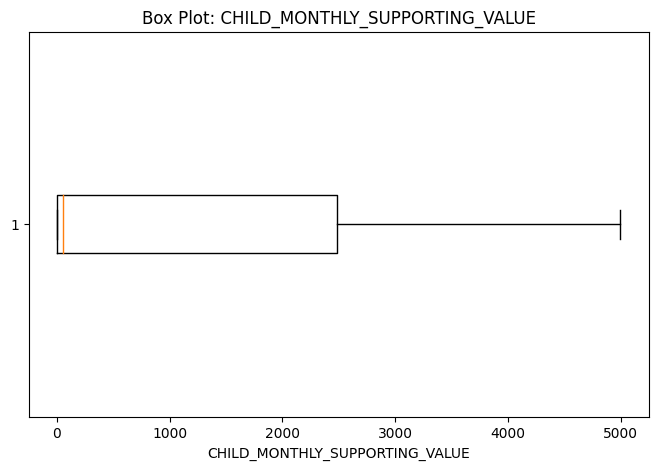

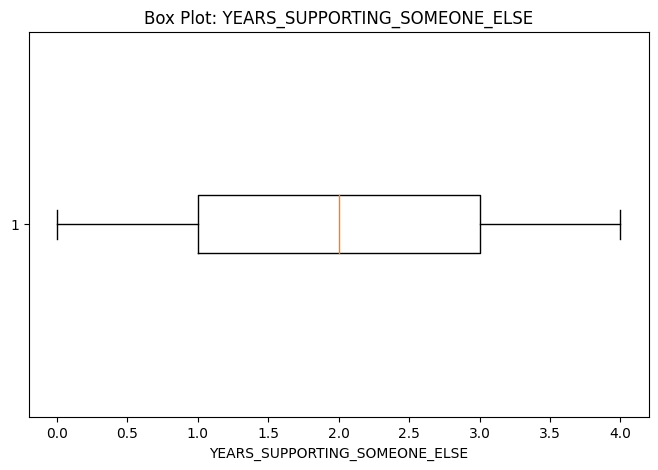

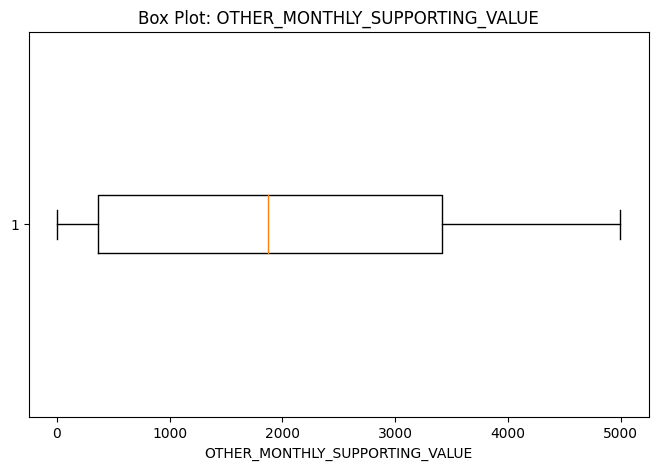

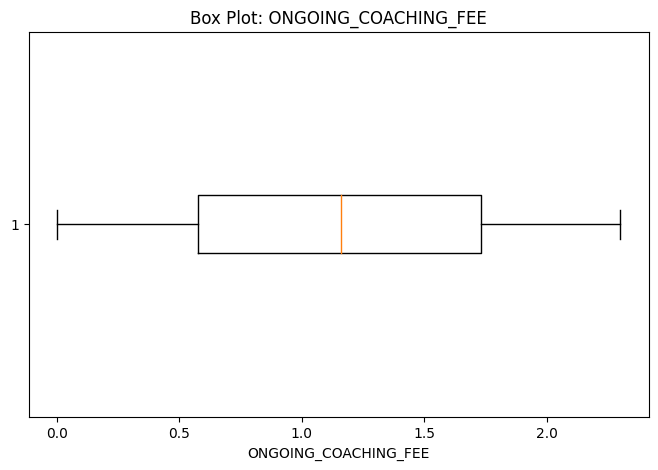

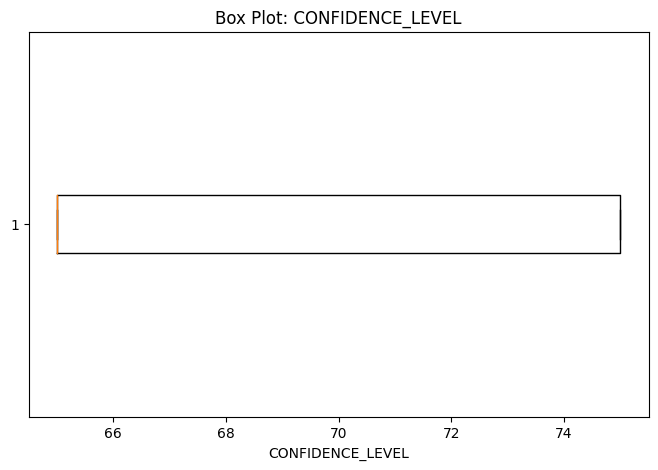

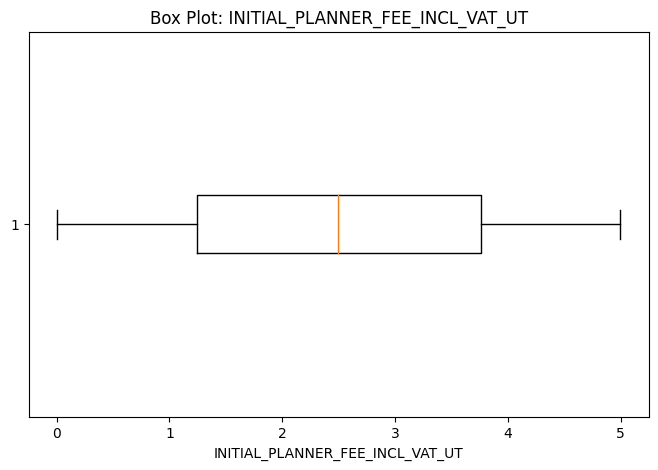

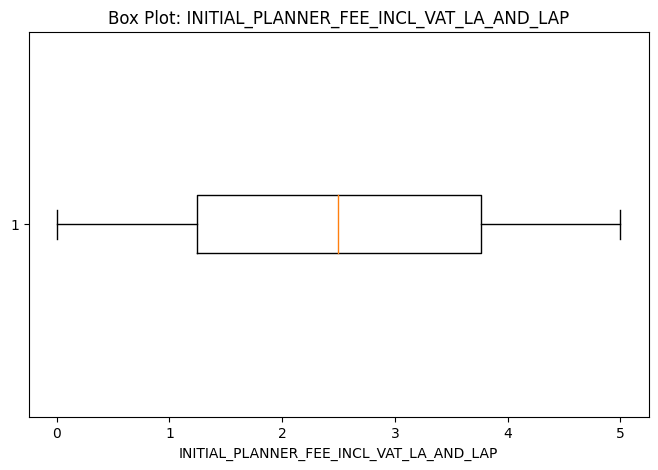

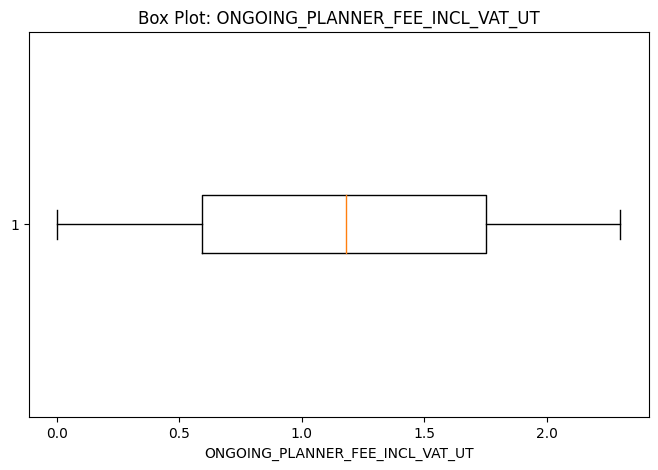

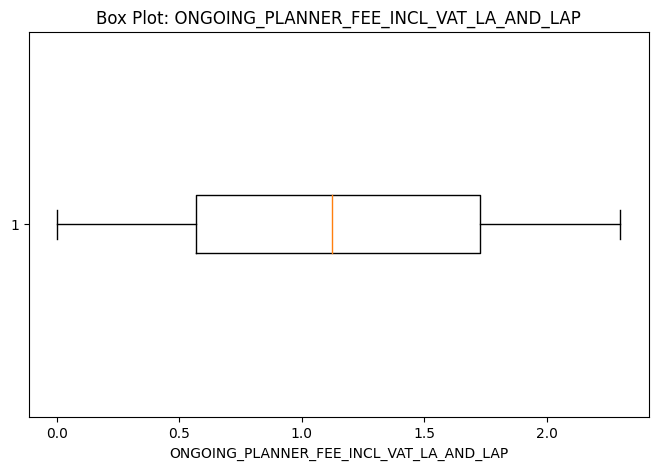

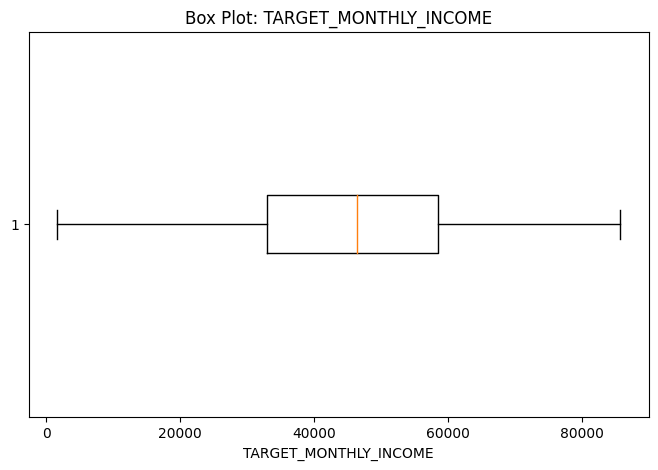

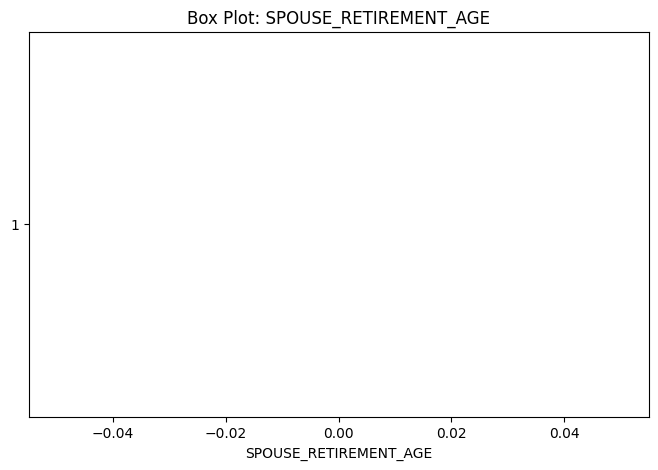

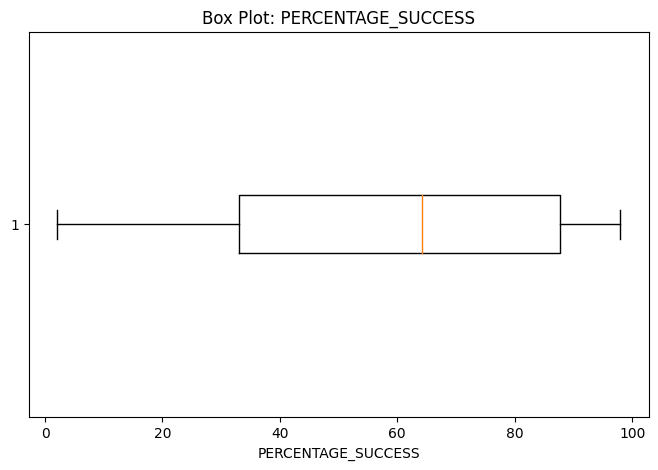

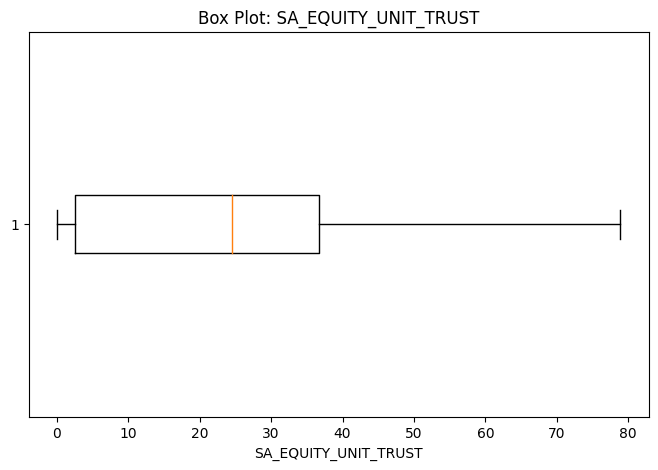

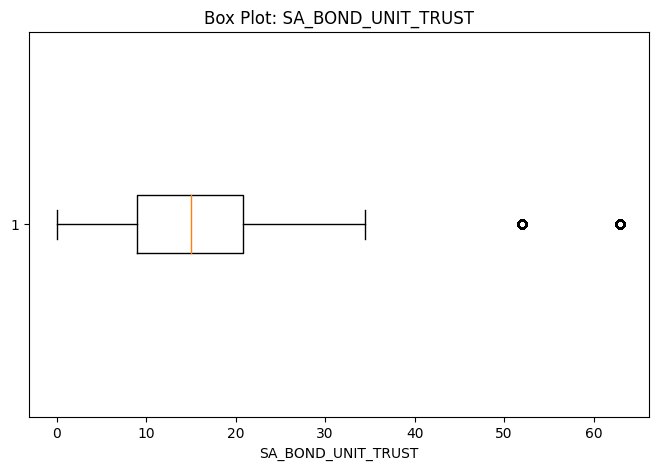

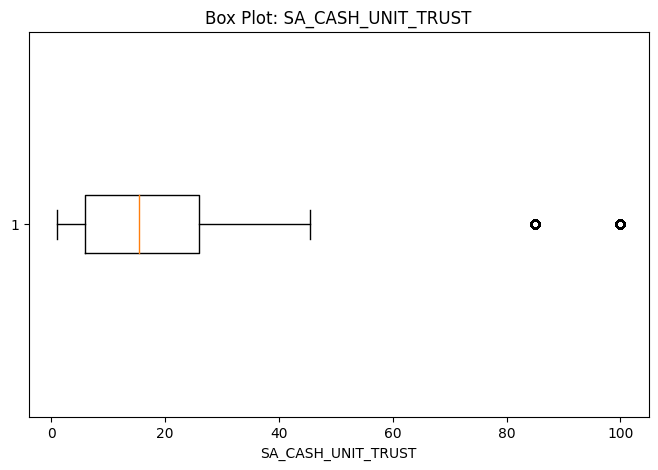

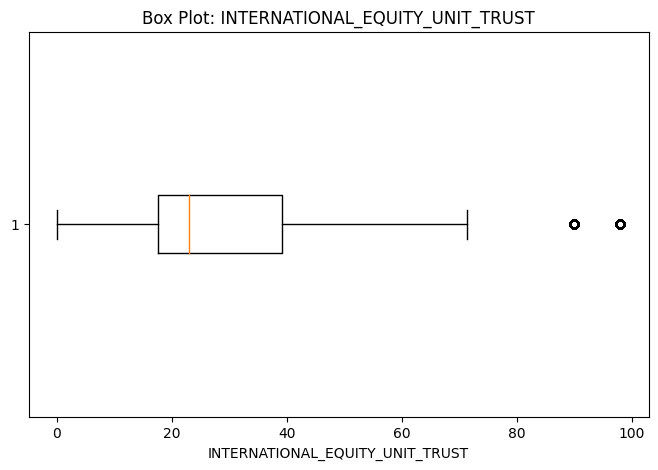

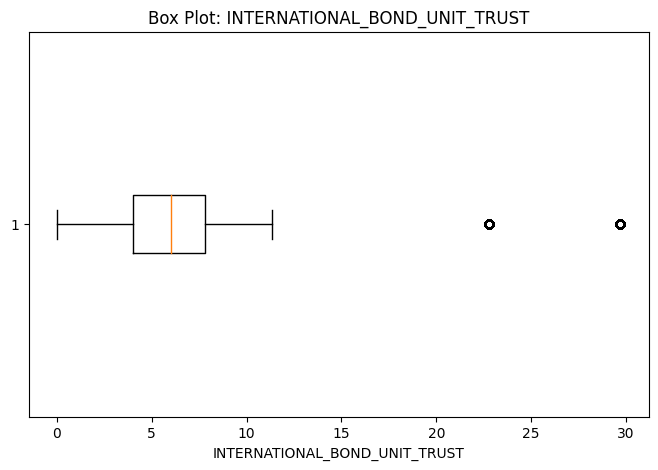

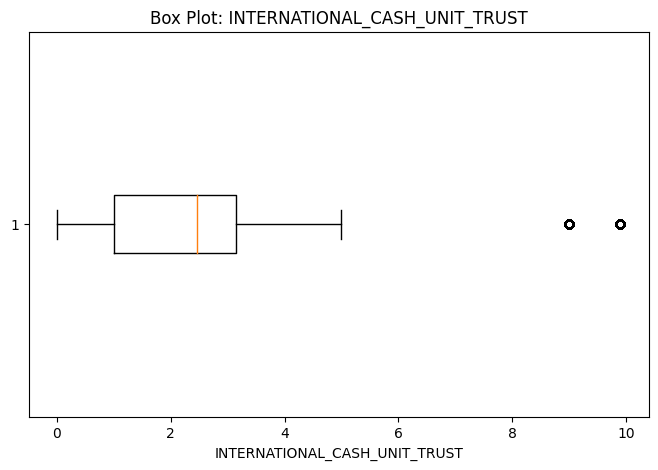

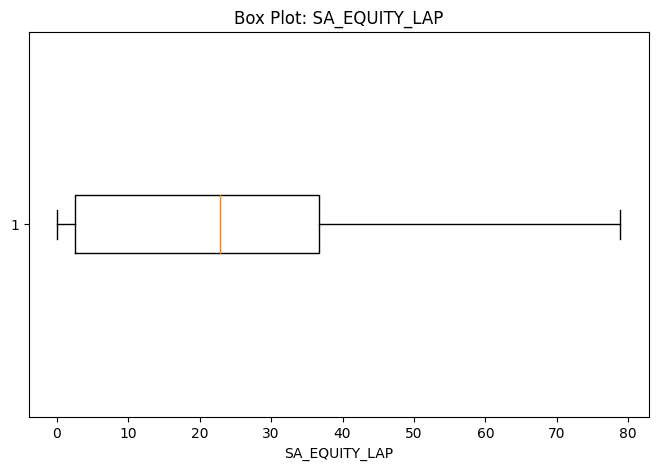

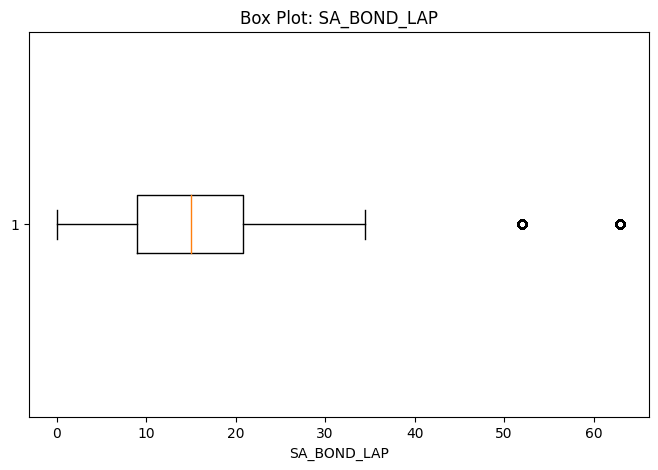

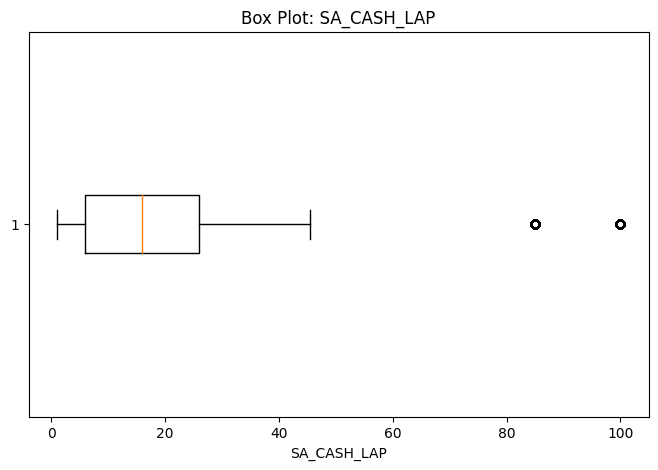

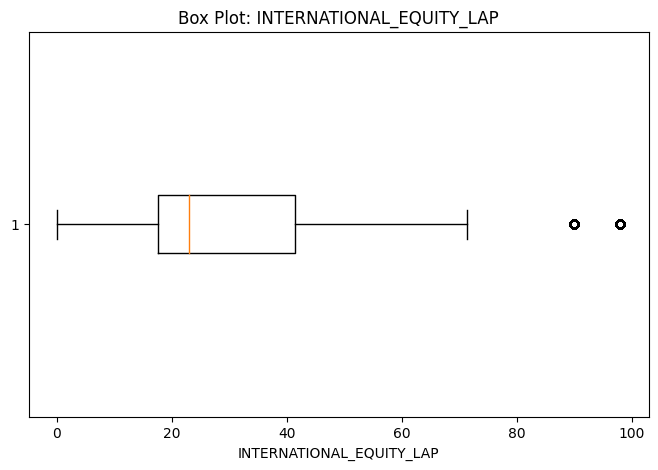

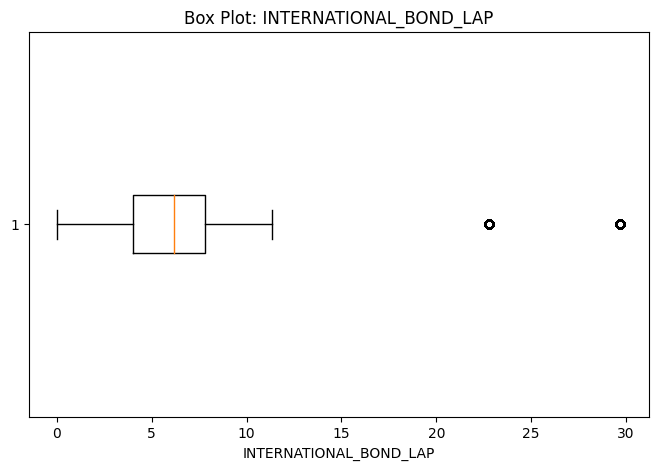

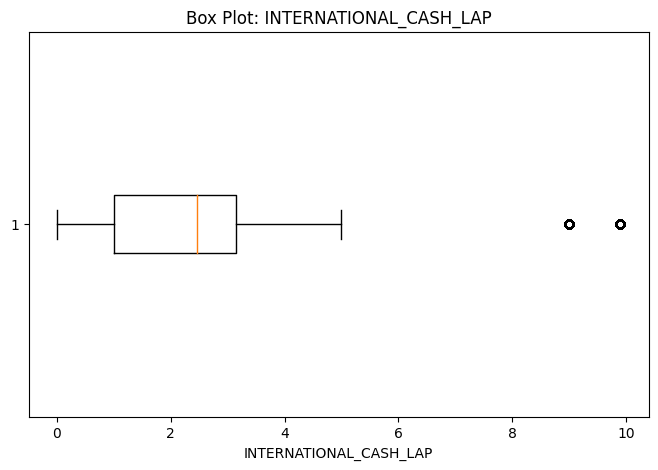

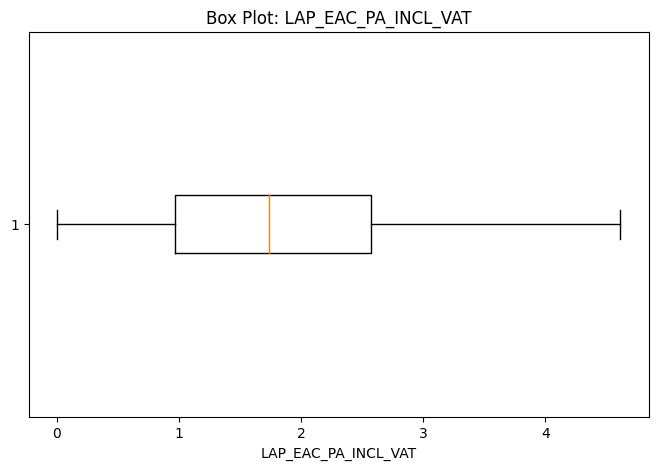

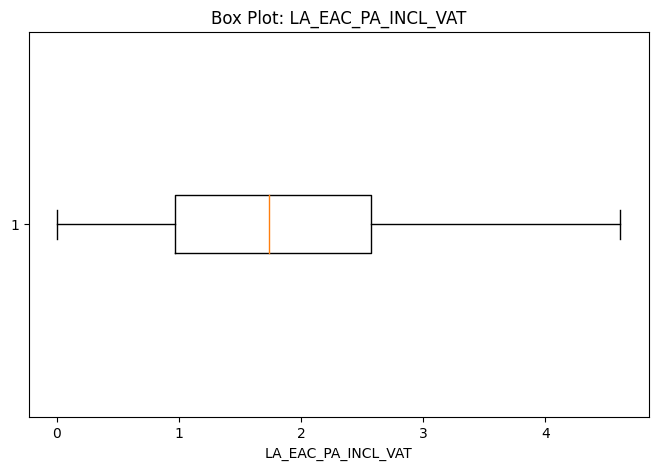

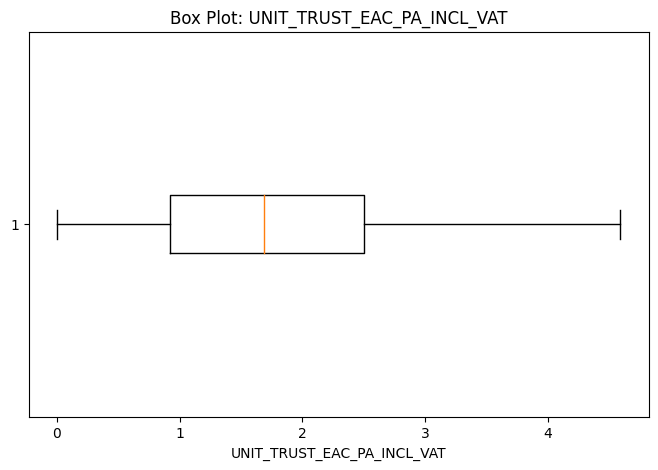

In [ ]:
# Get the numerical columns in the dataset
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Create box plots for all numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Box Plot: {col}')
    plt.xlabel(col)
    plt.show()



# Data Preprocessing


<h2>Handling Missing Values</h2>

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
# Replace missing values with 'NA' in SPOUSE_GENDER
df['SPOUSE_GENDER'].fillna('NA', inplace=True)
df_test['SPOUSE_GENDER'].fillna('NA', inplace=True)
df_validation['SPOUSE_GENDER'].fillna('NA', inplace=True)

# inserting 0 for null values in spouse retirement age
df['SPOUSE_RETIREMENT_AGE'] = df['SPOUSE_RETIREMENT_AGE'].fillna(0).astype('int64')
df_test['SPOUSE_RETIREMENT_AGE'] = df_test['SPOUSE_RETIREMENT_AGE'].fillna(0).astype('int64')
df_validation['SPOUSE_RETIREMENT_AGE'] = df_validation['SPOUSE_RETIREMENT_AGE'].fillna(0).astype('int64')

In [ ]:
df['SPOUSE_RETIREMENT_AGE'].head(15)

In [ ]:
df[['SPOUSE_GENDER','SPOUSE_RETIREMENT_AGE','SPOUSE_DATE_OF_BIRTH']].isnull().sum()

In [ ]:
df['SPOUSE_DATE_OF_BIRTH'].head(15)

In [ ]:
# Convert 'SPOUSE_DATE_OF_BIRTH' to pandas datetime format
df['SPOUSE_DATE_OF_BIRTH'] = pd.to_datetime(df['SPOUSE_DATE_OF_BIRTH'], errors='coerce')
df_test['SPOUSE_DATE_OF_BIRTH'] = pd.to_datetime(df_test['SPOUSE_DATE_OF_BIRTH'], errors='coerce')
df_validation['SPOUSE_DATE_OF_BIRTH'] = pd.to_datetime(df_validation['SPOUSE_DATE_OF_BIRTH'], errors='coerce')


# Display the DataFrame with the converted datetime column
df['SPOUSE_DATE_OF_BIRTH'].head(15)

Converting all DOB to year of birth

In [ ]:
df['SPOUSE_DATE_OF_BIRTH'] = df['SPOUSE_DATE_OF_BIRTH'].dt.year.astype('Int64')
df['SPOUSE_DATE_OF_BIRTH'].fillna(0, inplace=True)

df_test['SPOUSE_DATE_OF_BIRTH'] = df_test['SPOUSE_DATE_OF_BIRTH'].dt.year.astype('Int64')
df_test['SPOUSE_DATE_OF_BIRTH'].fillna(0, inplace=True)

df_validation['SPOUSE_DATE_OF_BIRTH'] = df_validation['SPOUSE_DATE_OF_BIRTH'].dt.year.astype('Int64')
df_validation['SPOUSE_DATE_OF_BIRTH'].fillna(0, inplace=True)

In [ ]:
df['SPOUSE_DATE_OF_BIRTH'].head()

In [ ]:
df[['SPOUSE_GENDER','SPOUSE_RETIREMENT_AGE','SPOUSE_DATE_OF_BIRTH']].isnull().sum()

<h2>Standardisation</h2>

In [ ]:
# Extract numerical columns for standardization
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df_test[numerical_columns] = scaler.fit_transform(df_test[numerical_columns])
df_validation[numerical_columns] = scaler.fit_transform(df_validation[numerical_columns])

In [ ]:
objs = df.select_dtypes(include = "object").columns
print(objs)

over here-

GENDER and SPOUSE_GENDER should be one hot encoded and

FINANCIALLY_SUPPORT_PARTNER, FINANCIALLY_SUPPORT_CHILDREN, HAS_EMERGENCY_SAVINGS, HAS_EMERGENCY_SAVINGS, CRITICAL_ILLNESS and SPOUSE_DATE_OF_BIRTH should be label encoded

<h2>Encoding of categorical variables</h2>

In [ ]:
# One-hot-encoding
df = pd.get_dummies(df, columns=['GENDER', 'SPOUSE_GENDER'])
df_validation = pd.get_dummies(df_validation, columns=['GENDER', 'SPOUSE_GENDER'])
df_test = pd.get_dummies(df_test, columns=['GENDER', 'SPOUSE_GENDER'])

In [ ]:
df_test.info()

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

for col in objs[1:-1]:
  df[col] = encode.fit_transform(df[col].astype(str))
  df_validation[col] = encode.fit_transform(df_validation[col].astype(str))
  df_test[col] = encode.fit_transform(df_test[col].astype(str))

df_test.head()

In [ ]:
df_test.info()

## Feature Selection

###Lasso regression

####get the best alpha value

In [ ]:
from sklearn.linear_model import LassoCV

# Create a LassoCV model with a range of alpha values
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)

# Fit the model on the training data
lasso_cv.fit(X_train, y_train)

# Get the best alpha value
best_alpha = lasso_cv.alpha_

best_alpha

0.01

####get the list of selected features

In [ ]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model with a specific alpha
lasso_model = Lasso(alpha=0.01)

# Fit the model to the data
lasso_model.fit(X_train, y_train)

# Get the coefficients
coefficients = lasso_model.coef_

# Identify which coefficients are non-zero
non_zero_features = [i for i, coef in enumerate(coefficients) if coef != 0]

non_zero_features

# Assuming 'df' is your DataFrame
selected_feature_names = df.columns[non_zero_features]

# Print the feature names with non-zero coefficients
print("Selected Feature Names:")
print(selected_feature_names)


Selected Feature Names:
Index(['RETIREMENT_AGE', 'RETIREMENT_FUND_VALUE', 'DEPT_VALUE',
       'SPARE_CASH_VALUE', 'OTHER_MONTHLY_SUPPORTING_VALUE',
       'CRITICAL_ILLNESS', 'SPOUSE_GENDER', 'SPOUSE_RETIREMENT_AGE',
       'SPOUSE_DATE_OF_BIRTH', 'INTERNATIONAL_CASH_UNIT_TRUST',
       'SA_EQUITY_LAP', 'SA_BOND_LAP', 'SA_CASH_LAP', 'INTERNATIONAL_CASH_LAP',
       'LA_EAC_PA_INCL_VAT', 'UNIT_TRUST_EAC_PA_INCL_VAT'],
      dtype='object')


In [ ]:
# Drop the target variable from the features
X = df.drop('TARGET_MONTHLY_INCOME', axis=1)

# Extract the target variable
y = df['TARGET_MONTHLY_INCOME']

# Choose the number of folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize the Lasso regression model
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha (regularization strength)

# Perform k-fold cross-validation with Lasso regression
cv_r2_lasso = cross_val_score(lasso_model, X, y, cv=kf, scoring='r2')

# individual fold results
for i, r2 in enumerate(cv_r2_lasso):
    print(f'Fold {i+1} R2 for Lasso Regression: {r2}')

# average cross-validation results for Lasso regression
print(f'\nCross-Validation R-squared (R2) for Lasso Regression: {np.mean(cv_r2_lasso)}')

Fold 1 R2 for Lasso Regression: 0.8469442229447001
Fold 2 R2 for Lasso Regression: 0.8474679311740567
Fold 3 R2 for Lasso Regression: 0.8498105720499565
Fold 4 R2 for Lasso Regression: 0.8505768002191685
Fold 5 R2 for Lasso Regression: 0.8375508230261376

Cross-Validation R-squared (R2) for Lasso Regression: 0.8464700698828038


###Validation

In [ ]:
# Drop the target variable from the features
X_val = df_validation.drop('TARGET_MONTHLY_INCOME', axis=1)

# Extract the target variable
y_val = df_validation['TARGET_MONTHLY_INCOME']

# Choose the number of folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize the Lasso regression model (use the same model you trained earlier)
lasso_model = Lasso(alpha=0.01)

# Lists to store individual fold results
fold_r2_scores = []
fold_rmse_scores = []

# Perform k-fold cross-validation on the validation dataset
for train_index, test_index in kf.split(X_val):
    X_val_train, X_val_test = X_val.iloc[train_index], X_val.iloc[test_index]
    y_val_train, y_val_test = y_val.iloc[train_index], y_val.iloc[test_index]

    # Fit the model to the training data
    lasso_model.fit(X_val_train, y_val_train)

    # Make predictions on the validation set
    y_val_pred = lasso_model.predict(X_val_test)

    # Evaluate the model for this fold
    fold_r2 = r2_score(y_val_test, y_val_pred)
    fold_rmse = np.sqrt(mean_squared_error(y_val_test, y_val_pred))

    # Append fold results to the lists
    fold_r2_scores.append(fold_r2)
    fold_rmse_scores.append(fold_rmse)

# Calculate and print average R2 and RMSE scores across all folds
average_r2 = np.mean(fold_r2_scores)
average_rmse = np.mean(fold_rmse_scores)

print(f'Validation Average R-squared (R2) score: {average_r2}')
print(f'Validation Average Root Mean Squared Error (RMSE): {average_rmse}')


Validation Average R-squared (R2) score: 0.8523227907897273
Validation Average Root Mean Squared Error (RMSE): 0.38409804365851036


In [ ]:
selected_feature_names

Index(['RETIREMENT_AGE', 'RETIREMENT_FUND_VALUE', 'DEPT_VALUE',
       'SPARE_CASH_VALUE', 'OTHER_MONTHLY_SUPPORTING_VALUE',
       'CRITICAL_ILLNESS', 'SPOUSE_GENDER', 'SPOUSE_RETIREMENT_AGE',
       'SPOUSE_DATE_OF_BIRTH', 'INTERNATIONAL_CASH_UNIT_TRUST',
       'SA_EQUITY_LAP', 'SA_BOND_LAP', 'SA_CASH_LAP', 'INTERNATIONAL_CASH_LAP',
       'LA_EAC_PA_INCL_VAT', 'UNIT_TRUST_EAC_PA_INCL_VAT'],
      dtype='object')

In [ ]:
feature_list=['RETIREMENT_AGE', 'RETIREMENT_FUND_VALUE', 'DEPT_VALUE',
       'SPARE_CASH_VALUE', 'OTHER_MONTHLY_SUPPORTING_VALUE',
       'CRITICAL_ILLNESS', 'SPOUSE_GENDER', 'SPOUSE_RETIREMENT_AGE',
       'SPOUSE_DATE_OF_BIRTH', 'INTERNATIONAL_CASH_UNIT_TRUST',
       'SA_EQUITY_LAP', 'SA_BOND_LAP', 'SA_CASH_LAP', 'INTERNATIONAL_CASH_LAP',
       'LA_EAC_PA_INCL_VAT', 'UNIT_TRUST_EAC_PA_INCL_VAT']
df_selected=df[feature_list]

## Model Training

In [ ]:
X_train= df.drop(['TARGET_MONTHLY_INCOME'],axis=1)
Y_train= df['TARGET_MONTHLY_INCOME']
X_test= df_test.drop(['TARGET_MONTHLY_INCOME'],axis=1)
Y_test=df_test['TARGET_MONTHLY_INCOME']
X_val= df_validation.drop(['TARGET_MONTHLY_INCOME'],axis=1)
Y_val=df_validation['TARGET_MONTHLY_INCOME']
print(Y_train.shape)

Our target variable is Target_monthly_income which the targeted monthly income the customer should have in order to reach their expected retirement fund value

### Decision Trees

In [ ]:
final_cols = ['RETIREMENT_AGE', 'RETIREMENT_FUND_VALUE', 'DEPT_VALUE',
       'SPARE_CASH_VALUE', 'OTHER_MONTHLY_SUPPORTING_VALUE',
       'CRITICAL_ILLNESS', 'SPOUSE_GENDER_Female', 'SPOUSE_GENDER_Male', 'SPOUSE_GENDER_NA', 'SPOUSE_RETIREMENT_AGE',
       'SPOUSE_DATE_OF_BIRTH', 'INTERNATIONAL_CASH_UNIT_TRUST',
       'SA_EQUITY_LAP', 'SA_BOND_LAP', 'SA_CASH_LAP', 'INTERNATIONAL_CASH_LAP',
       'LA_EAC_PA_INCL_VAT', 'UNIT_TRUST_EAC_PA_INCL_VAT']

In [ ]:
target_variable = 'TARGET_MONTHLY_INCOME'

# splitting using 80:20 on df
x_train, x_test, y_train, y_test = train_test_split(df[final_cols], df[target_variable], test_size=0.8, random_state=42)

# Initialize the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree Regressor on the training set
decision_tree.fit(x_train, y_train)

# Make predictions on the validation set
y_pred = decision_tree.predict(x_test)

### Random Forest Regressor

In [ ]:
model=RandomForestRegressor(random_state=42)
model.fit(X_train,Y_train)

In [ ]:
Y_pred=model.predict(X_val)

rmse= mean_squared_error(Y_val, Y_pred, squared=False)
mae= mean_absolute_error(Y_val, Y_pred)
r2=r2_score(Y_val, Y_pred)
print("The Root mean squared error is: ",rmse)
print("The Mean absolute error is: ",mae)
print("The R-2 Score is: ",r2)

In [ ]:
print("First 10 Predicted vs Real Values:")
for i in range(10):
    print(f"Predicted: {Y_pred[i]:.2f}, Actual: {Y_test.iloc[i]:.2f}")


In [ ]:
from sklearn.model_selection import KFold
import numpy as np


# Define the number of folds (f)
f = 5

# Initialize KFold object
kf = KFold(n_splits=f, shuffle=True, random_state=42)

# Initialize empty lists to store performance metrics
rmse_scores = []
mae_scores = []
r2_scores = []

for train_index, val_index in kf.split(X_train):
    # Split combined data into training and validation sets
    X_fold_train = X_train.iloc[train_index]
    Y_fold_train = Y_train.iloc[train_index]

    X_fold_val = X_train.iloc[val_index]
    Y_fold_val = Y_train.iloc[val_index]

    # Train the model on the training fold
    model = RandomForestRegressor(random_state=42)
    model.fit(X_fold_train, Y_fold_train)

    # Make predictions on the validation fold
    predictions_fold_val = model.predict(X_fold_val)

    # Calculate metrics for the validation fold
    rmse_fold = mean_squared_error(Y_fold_val, predictions_fold_val, squared=False)
    mae_fold = mean_absolute_error(Y_fold_val, predictions_fold_val)
    r2_fold = r2_score(Y_fold_val, predictions_fold_val)

    # Append metrics to the lists
    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)
    r2_scores.append(r2_fold)

# Calculate average metrics across all folds
average_rmse = np.mean(rmse_scores)
average_mae = np.mean(mae_scores)
average_r2 = np.mean(r2_scores)

print('Average RMSE:', average_rmse)
print('Average MAE:', average_mae)
print('Average R2:', average_r2)


In [ ]:
# Initialize empty lists to store performance metrics for testing set
test_rmse_scores = []
test_mae_scores = []
test_r2_scores = []

# Perform K-fold cross-validation on the testing set
for train_index, val_index in kf.split(X_test):
    # Split testing data into training and validation sets
    X_fold_train_test = X_test.iloc[train_index]
    Y_fold_train_test = Y_test.iloc[train_index]

    X_fold_val_test = X_test.iloc[val_index]
    Y_fold_val_test = Y_test.iloc[val_index]

    # Train the model on the training fold of testing set
    model_test = RandomForestRegressor(random_state=42)
    model_test.fit(X_fold_train_test, Y_fold_train_test)

    # Make predictions on the validation fold of testing set
    predictions_fold_val_test = model_test.predict(X_fold_val_test)

    # Calculate metrics for the validation fold of testing set
    rmse_fold_test = mean_squared_error(Y_fold_val_test, predictions_fold_val_test, squared=False)
    mae_fold_test = mean_absolute_error(Y_fold_val_test, predictions_fold_val_test)
    r2_fold_test = r2_score(Y_fold_val_test, predictions_fold_val_test)

    # Append metrics to the lists
    test_rmse_scores.append(rmse_fold_test)
    test_mae_scores.append(mae_fold_test)
    test_r2_scores.append(r2_fold_test)

# Calculate average metrics across all folds for testing set
average_test_rmse = np.mean(test_rmse_scores)
average_test_mae = np.mean(test_mae_scores)
average_test_r2 = np.mean(test_r2_scores)

print('Average Test RMSE:', average_test_rmse)
print('Average Test MAE:', average_test_mae)
print('Average Test R2:', average_test_r2)
print(test_r2_scores)

In [ ]:
#To get the parameters of the model
model.get_params()

In [ ]:
df.shape

In [ ]:
tree=RandomForestRegressor(max_depth=25,bootstrap=True,random_state=42)

In [ ]:
final_cols = ['RETIREMENT_AGE', 'RETIREMENT_FUND_VALUE', 'DEPT_VALUE',
       'SPARE_CASH_VALUE', 'OTHER_MONTHLY_SUPPORTING_VALUE',
       'CRITICAL_ILLNESS', 'SPOUSE_GENDER_Female', 'SPOUSE_GENDER_Male', 'SPOUSE_GENDER_NA', 'SPOUSE_RETIREMENT_AGE',
       'SPOUSE_DATE_OF_BIRTH', 'INTERNATIONAL_CASH_UNIT_TRUST',
       'SA_EQUITY_LAP', 'SA_BOND_LAP', 'SA_CASH_LAP', 'INTERNATIONAL_CASH_LAP',
       'LA_EAC_PA_INCL_VAT', 'UNIT_TRUST_EAC_PA_INCL_VAT']
df_selected=df[final_cols]

In [ ]:
x = df.drop('TARGET_MONTHLY_INCOME', axis=1)
y = df['TARGET_MONTHLY_INCOME']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(y_train.shape)

### linear regression

In [ ]:
x=df_selected
y=df['TARGET_MONTHLY_INCOME']
x_train,x_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
linear_model=LinearRegression()
linear_model.fit(x_train,Y_train)
pred=linear_model.predict(x_test)
print(f"R-2: {r2_score(y_test,pred)}")
print(mean_absolute_error(y_test,pred))

coefficients = linear_model.coef_

# Identify which coefficients are non-zero
non_zero_features = [i for i, coef in enumerate(coefficients) if coef != 0]

non_zero_features

# Assuming 'df' is your DataFrame
selected_feature_name = df_selected.columns[non_zero_features]

# Print the feature names with non-zero coefficients
print("Selected Feature Names:")
print(selected_feature_name)

R-2: 0.6140307475452762
0.5219683195306869
Selected Feature Names:
Index(['RETIREMENT_AGE', 'RETIREMENT_FUND_VALUE', 'DEPT_VALUE',
       'SPARE_CASH_VALUE', 'OTHER_MONTHLY_SUPPORTING_VALUE',
       'CRITICAL_ILLNESS', 'SPOUSE_GENDER', 'SPOUSE_RETIREMENT_AGE',
       'SPOUSE_DATE_OF_BIRTH', 'INTERNATIONAL_CASH_UNIT_TRUST',
       'SA_EQUITY_LAP', 'SA_BOND_LAP', 'SA_CASH_LAP', 'INTERNATIONAL_CASH_LAP',
       'LA_EAC_PA_INCL_VAT', 'UNIT_TRUST_EAC_PA_INCL_VAT'],
      dtype='object')
